In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 150MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.5MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile ('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [20]:
#generators - to divide data into batches in order to process data in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
#Normalize Numpy array values
def process(image, label):
  image = tf.cast(image/255. , tf.float32 )
  return image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [22]:
#CNN Model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding = 'valid', activation ='relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides =2, padding ='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding = 'valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides =2, padding ='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding = 'valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides =2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation ='sigmoid'))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [25]:
history = model.fit(train_ds, epochs =5, validation_data = validation_ds)

Epoch 1/5
625/625 [==============================] - 68s 102ms/step - loss: 0.9205 - accuracy: 0.6168 - val_loss: 0.6558 - val_accuracy: 0.6500
Epoch 2/5
625/625 [==============================] - 64s 102ms/step - loss: 0.5272 - accuracy: 0.7456 - val_loss: 0.4613 - val_accuracy: 0.7810
Epoch 3/5
625/625 [==============================] - 66s 105ms/step - loss: 0.4444 - accuracy: 0.7958 - val_loss: 0.7081 - val_accuracy: 0.6834
Epoch 4/5
625/625 [==============================] - 69s 110ms/step - loss: 0.3867 - accuracy: 0.8262 - val_loss: 0.5431 - val_accuracy: 0.7500
Epoch 5/5
625/625 [==============================] - 71s 113ms/step - loss: 0.3099 - accuracy: 0.8672 - val_loss: 0.6686 - val_accuracy: 0.7706


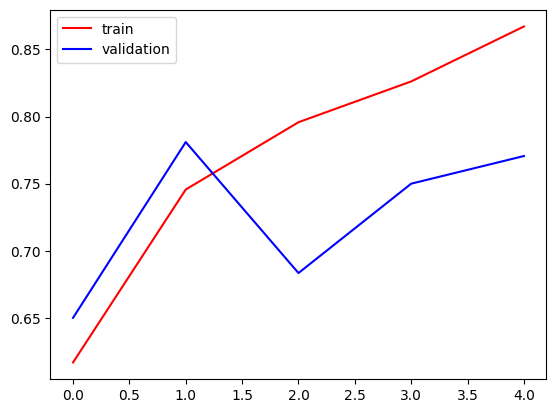

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color ='red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

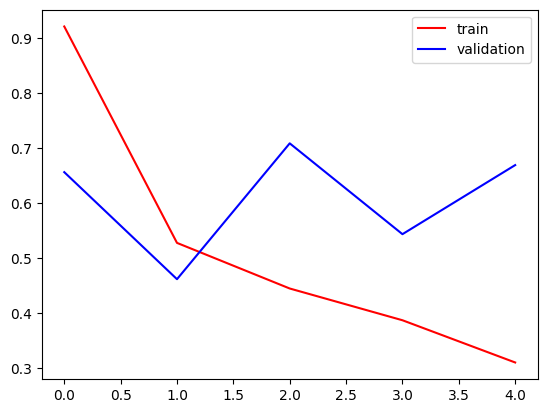

In [30]:
plt.plot(history.history['loss'], color ='red', label ='train')
plt.plot(history.history['val_loss'],color = 'blue', label = 'validation')
plt.legend()
plt.show()


In [31]:
#ways to reduce overfitting

#add more data
# Data Augmentation
# L1/L2 Regulizer
# Dropout
# Batch Normalization
# Reduce complexity

In [26]:
#testing model

import cv2

In [27]:
test_img = cv2.imread('/content/dog.jpg')

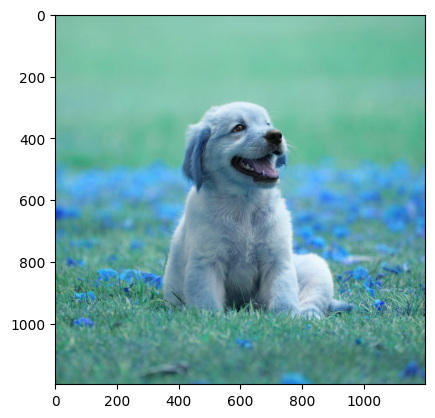

In [28]:
plt.imshow(test_img)

In [32]:
test_img.shape

(1197, 1200, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

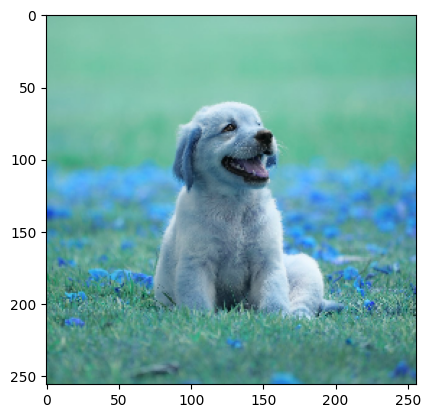

In [34]:
plt.imshow(test_img)

In [37]:
test_input = test_img.reshape((1,256,256,3))


In [39]:
model.predict(test_input)

1/1 [==============================] - 1s 680ms/step


array([[1.]], dtype=float32)

##Data Augmentation

In [1]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
img = image.load_img('/content/dog.jpg', target_size = (256,256))


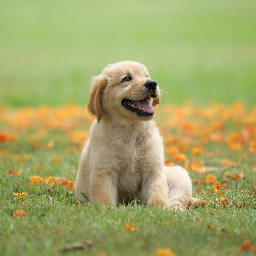

In [3]:
img

In [4]:
datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        fill_mode = 'reflect')

In [5]:
img = image.img_to_array(img)

In [6]:
img.shape

(256, 256, 3)

In [7]:
input_batch = img.reshape(1,256,256,3)

In [8]:
#for just one image:

i=0
for output in datagen.flow(input_batch, batch_size=1, save_to_dir ='/content/aug'):
  i= i+1

  if i==10:
    break

In [9]:
# For multiple images:

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory( 'data/train' ,
                                                    target_size = (150,150),
                                                     batch_size = batch_size,
                                                     class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
    'data/validation',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

In [10]:
#after this write model

In [ ]:
 model.fit_generator(
     train_generator,
     steps_per_epoch = 2000 // batch_size,
     epochs =25,
     validation_data = validation_generator,
     validation_steps = 800 // batch_size
 )